<a href="https://colab.research.google.com/github/Taejin1221/MachineLearning/blob/master/TrajectoryAugmentation/AutoEncoder_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape( ( -1, 784 ) )
x_test = x_test.reshape( ( -1, 784 ) )

x_train.shape, x_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 784), (10000, 784))

In [3]:
# hyper parameters
n_input = 784
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = 300
n_output = 784

In [4]:
model = keras.Sequential()
model.add( layers.Dense( n_input, 'sigmoid', input_shape = ( 784, ), name = 'Encoder' ) )
model.add( layers.Dense( n_hidden1, 'sigmoid', name = 'Hidden1' ) )
model.add( layers.Dense( n_hidden2, 'sigmoid', name = 'Hidden2' ) )
model.add( layers.Dense( n_hidden3, 'sigmoid', name = 'Hidden3' ) )
model.add( layers.Dense( n_output, name = 'Decoder' ) )

In [5]:
model.compile( optimizer = keras.optimizers.SGD(), loss = 'MSE' )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoder (Dense)              (None, 784)               615440    
_________________________________________________________________
Hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
Hidden2 (Dense)              (None, 150)               45150     
_________________________________________________________________
Hidden3 (Dense)              (None, 300)               45300     
_________________________________________________________________
Decoder (Dense)              (None, 784)               235984    
Total params: 1,177,374
Trainable params: 1,177,374
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit( x_train, x_train, epochs = 10 )

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4489.2622
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4373.5903
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4369.8701
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4370.2222
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4365.8359
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4365.2939
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4364.4951
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4373.5337
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4367.3530
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4371.0786


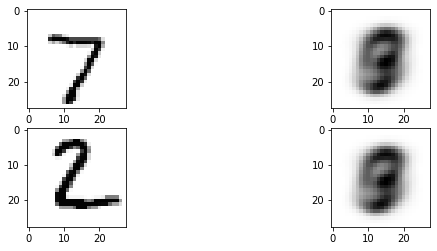

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

n_test_digits = 2

outputs_val = model.predict( x_test[:2] )
fig = plt.figure(figsize=(10, 4))
for digit_index in range(n_test_digits):
    plt.subplot( n_test_digits, 2, digit_index * 2 + 1 )
    plt.imshow( x_test[digit_index].reshape( [28, 28] ), cmap = "Greys", interpolation="nearest" )

    plt.subplot( n_test_digits, 2, digit_index * 2 + 2 )
    plt.imshow( outputs_val[digit_index].reshape( [28, 28] ), cmap = "Greys", interpolation="nearest")